# ML_Simple_Linear_Regression

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [36]:
df = pd.read_csv("bd-dec21-age-specific-fertility-rates.csv")

# take a look at the dataset
df.head(10)

Period  Mothers_Age  Age_specific_birth_rate
0    2005        15.00                      0.2
1    2005        15.19                     27.2
2    2005        20.24                     67.6
3    2005        25.29                    104.9
4    2005        30.34                    117.1
5    2005        35.39                     62.3
6    2005        40.44                     12.0
7    2005         4.00                      0.6
8    2006        15.00                      0.2
9    2006        15.19                     28.1

In [37]:
# summarize the data
df.describe()

Period  Mothers_Age  Age_specific_birth_rate
count   136.00000   136.000000               136.000000
mean   2013.00000    28.059779                48.683088
std       4.91709    10.771361                43.764434
min    2005.00000     4.000000                 0.100000
25%    2009.00000    15.190000                 7.975000
50%    2013.00000    25.290000                40.050000
75%    2017.00000    35.390000                80.625000
max    2021.00000    45.000000               126.900000

In [38]:
cdf = df[['Mothers_Age','Age_specific_birth_rate']]
cdf.head(9)

Mothers_Age  Age_specific_birth_rate
0        15.00                      0.2
1        15.19                     27.2
2        20.24                     67.6
3        25.29                    104.9
4        30.34                    117.1
5        35.39                     62.3
6        40.44                     12.0
7         4.00                      0.6
8        15.00                      0.2

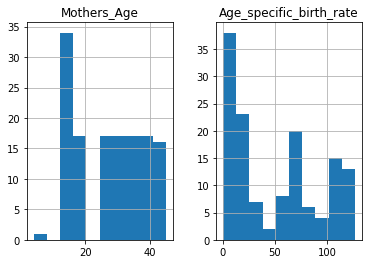

In [39]:
viz = cdf[['Mothers_Age','Age_specific_birth_rate']]
viz.hist()
plt.show()

In [40]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

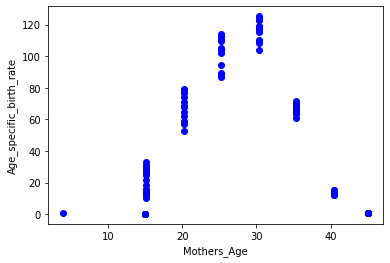

In [45]:
plt.scatter(train.Mothers_Age, train.Age_specific_birth_rate,  color='blue')
plt.xlabel('Mothers_Age')
plt.ylabel('Age_specific_birth_rate')
plt.show()

In [48]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["Mothers_Age"]])
train_y = np.asanyarray(train[["Age_specific_birth_rate"]])
regr.fit(train_x, train_y)
print('Coefficients: ', regr.coef_)
print("Intercept:",regr.intercept_)

Coefficients:  [[-0.02125358]]
Intercept: [48.00467189]


Text(0.5, 0, 'Age_specific_birth_rate')

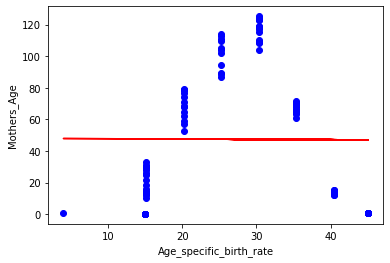

In [51]:
plt.scatter(train.Mothers_Age,train.Age_specific_birth_rate,color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'-r')
plt.ylabel("Mothers_Age")
plt.xlabel("Age_specific_birth_rate")

In [54]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Age_specific_birth_rate']])
test_y = np.asanyarray(test[["Mothers_Age"]])
test_y_ = regr.predict(test_x)
print("mean absolute error :%.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("123" % np.mean((test_y_ - test_y)**2))
print("R2" % r2_score(test_y , test_y_))

mean absolute error :17.37
123
R2
